In [2]:
# Shaojun Yu
# May 3
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = pandas.read_csv('project_data.txt', sep="\t")
X = data.drop(columns=['Phake.Disease'])
y = data['Phake.Disease']
X_std = (X - X.mean()) / X.std()

In [4]:
pca = PCA(n_components=2)
p = pca.fit_transform(X_std)

Text(0, 0.5, 'component 2')

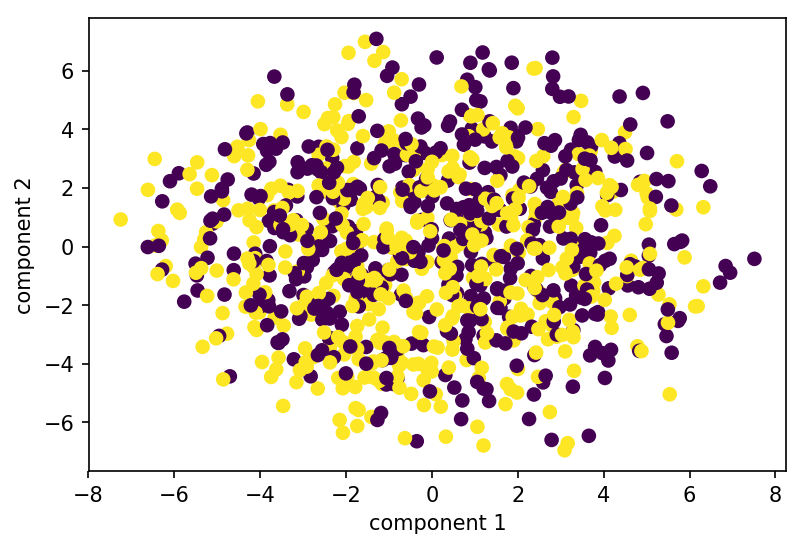

In [5]:
plt.figure(dpi=150)
a = plt.scatter(p[:,0], p[:,1], c=y.values)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [6]:
X_std2 = X.transpose()
X_std2 = (X_std2 - X_std2.mean()) / X_std2.std()
p = pca.fit_transform(X_std2)


Text(0, 0.5, 'component 2')

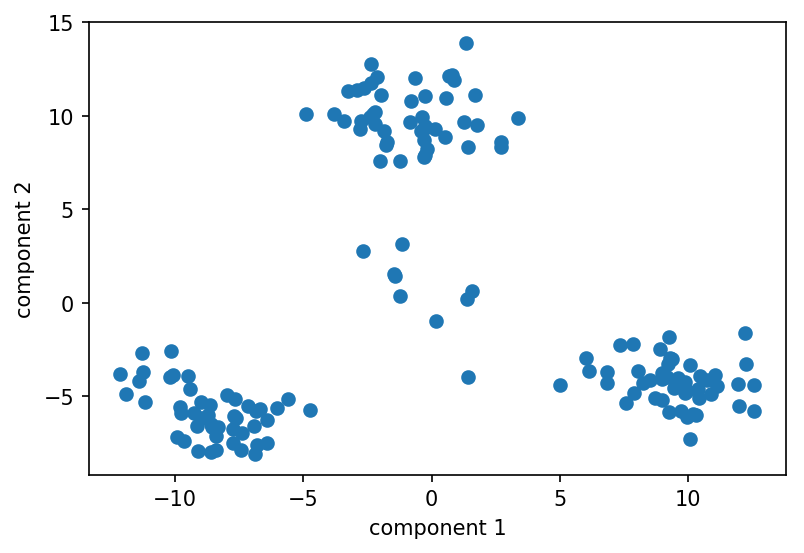

In [7]:
plt.figure(dpi=150)
plt.scatter(p[:,0], p[:,1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [8]:
from sklearn.cluster import k_means, AgglomerativeClustering
k = k_means(X_std2, 4)

a = AgglomerativeClustering(4).fit(X_std2)

In [9]:
a.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1])

In [10]:
k[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 0, 0, 2], dtype=int32)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Classifier 1 - SVM

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[0.001, 0.01, 0.02, 0.1, 0.5]}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters, cv=5, 
                   scoring='accuracy', 
                   return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

{'gamma': 0.02}

In [13]:
clf.score(X_val, y_val)

0.51

### Classifier 2 - Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],
             'max_depth':[1,2,5,10,20]}
dtc = DecisionTreeClassifier(random_state=0)
clf2 = GridSearchCV(dtc, parameters, cv=5, 
                   scoring='accuracy', 
                   return_train_score=True)
clf2.fit(X_train, y_train)
clf2.best_params_

/Users/yushaojun/tools/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy', 'max_depth': 2}

In [15]:
clf2.score(X_val, y_val)

0.66

### Classifier 3 - Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[100,150,200,500,600]}
rf = RandomForestClassifier(warm_start=True,
                              oob_score=True,
                              random_state=0)
clf3 = GridSearchCV(rf, parameters, cv=5, 
                   scoring='accuracy', 
                   return_train_score=True)
clf3.fit(X_train, y_train)
clf3.score(X_val, y_val)

0.68

In [17]:
clf3.best_params_

{'n_estimators': 200}

###  Performance  on test data

In [18]:
clf3.score(X_test, y_test)

0.72

In [19]:
rf = RandomForestClassifier(warm_start=True,
                              oob_score=True,
                              random_state=0,
                           n_estimators=200).fit(X_train, y_train)

### Feature Impotance

In [20]:
feature_importances = pandas.DataFrame([X_train.columns, rf.feature_importances_])
feature_importances.transpose().sort_values(by=[1], ascending=False)

,0,1
74,marker.75,0.0537531
34,marker.35,0.0473931
54,marker.55,0.0204723
39,marker.40,0.0108032
14,marker.15,0.00979185
87,marker.88,0.00938745
11,marker.12,0.00905819
52,marker.53,0.00875455
120,marker.121,0.00874613
112,marker.113,0.00858377
